In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 2559.5, 2047.5, -0.5)

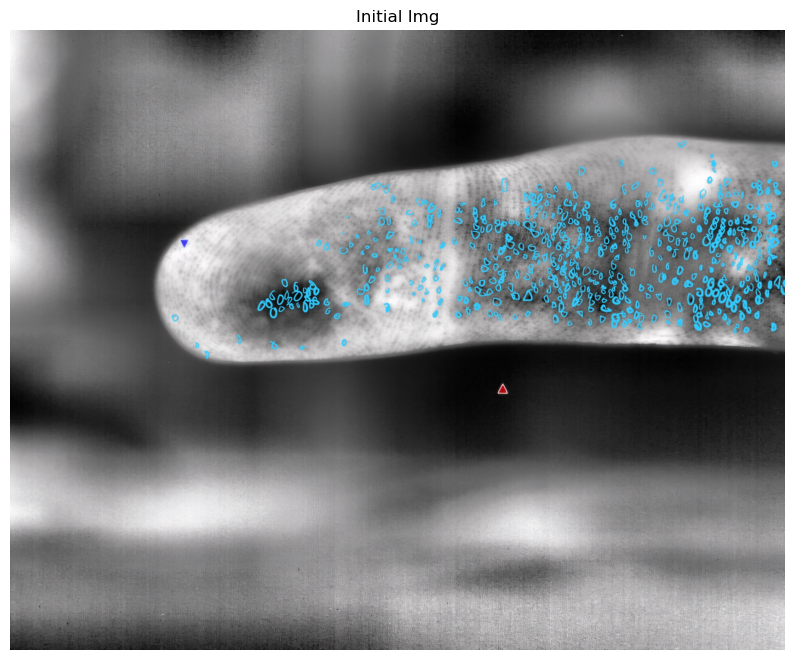

In [16]:
# Import data 
image_path = '/Users/rickysu/Projects/sweatPoresActivation/images/FingerStraightAnnotated.bmp'
img = cv2.imread(image_path)

# show the image 
plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = 'gray')
plt.title("Initial Img")
plt.axis("off")

# <span style="color: blue;">Preprocessing Image for Contour Detection</span>
## 1. Thresholding based preprocessing 
## 2. Edge detecting based preprocessing